In [1]:
from backend import *

In [ ]:
H=hamiltonian()

In [2]:
from scipy.linalg import eigh_tridiagonal
from scipy.linalg import ishermitian
import numpy as np
class hamiltonian:
    def __init__(self,array):
        if ishermitian(array)==False:
            raise ValueError("Hamiltonian is not hermitian")
        self.array=array
        self.tridiagonal=self.is_tridiagonal()
        if self.tridiagonal:
            D=self.array.diagonal
            off_D=self.array.diagonal(1)
            self.E,self.V=eigh_tridiagonal(D,off_D)
        else:
            self.E,self.V=np.linalg.eigh(self.array)
    def is_tridiagonal(self):
        n=len(self.array)
        for i in range(n):
            for j in range(n):
                if abs(i-j)>1 and self.array[i][j]!=0:
                    return False
        return True

In [7]:
H=np.array([[1,2,23],[2,4,5],[3,5,6]])
H=hamiltonian(H)
print(H.E)

ValueError: Hamiltonian is not hermitian

# Simulating the Return Problem

In [38]:
from backend.classes import return_problem
from backend.functions import first_detection_probability
import numpy as np
'''
Create a Hamiltonian to study
Force the Hamiltonian to be Hermitian
'''
#Create a Hamiltonian to study
L=20
N=10
F_n=np.zeros(int(1e5))
for i in range(N):
    H=np.random.normal(0,1,(L,L))
    H=H+H.T
    psi_0=np.zeros(L)
    psi_0[L//2]=1
    model=return_problem(H,psi_0,N=1e5)
    F_n+=first_detection_probability(model)/N

-2.3906195727458988 2.9252848742128807


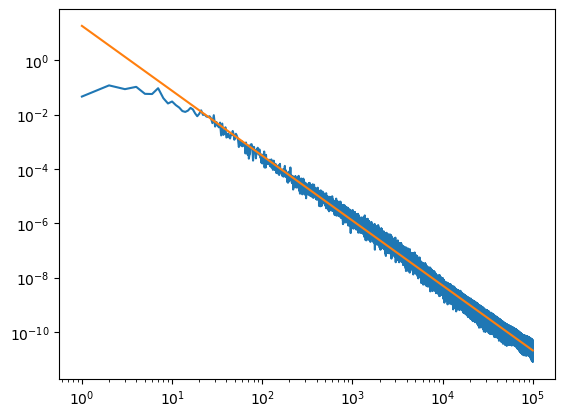

In [39]:
import matplotlib.pyplot as plt
x=np.arange(1,len(F_n)+1,1)
a,b=np.polyfit(np.log(x[1000:]),np.log(F_n[1000:]),1)
print(a,b)
plt.loglog(x,F_n)
plt.loglog(x,x**a*np.exp(b))

In [28]:
import numba
numba.__version__

'0.57.0'

In [4]:
import numpy as np
L=10
H1=np.random.normal(0,1,(L,L))
H2=np.random.normal(0,1,(L,L))
H3=np.random.normal(0,1,(L,L))
H_list=[H1,H2,H3]
for i in range(3):
    H_list[i-1]=H_list[i-1]+H_list[i-1].T

In [20]:
from backend.classes import return_problem
from numba import jit
class multiple_return_problems:
    '''
    This is suited for the case we study disordered systems and need to perform an average over many realizations of the disorder. Or interested in comparing multiple Hamiltonians at the same time
    '''
    def __init__(self,H_list,psi_0,tau=None,N=1e4):
        '''
        H_list: list of Hamiltonians
        psi_0: initial state
        tau: time step
        N: number of steps
        '''
        self.n=len(H_list)
        self.models=[None]*self.n
        for i in range(self.n):
            self.models[i]=return_problem(H_list[i],psi_0,tau,N)

In [22]:
psi_0=np.zeros(L)
psi_0[L//2]=1
model=multiple_return_problems(H_list,psi_0)


TypingError: Failed in nopython mode pipeline (step: nopython frontend)
Untyped global name 'return_problem': Cannot determine Numba type of <class 'type'>

File "../../../../tmp/ipykernel_72695/312554735.py", line 18:
<source missing, REPL/exec in use?> 

This error may have been caused by the following argument(s):
- argument 0: Cannot determine Numba type of <class '__main__.multiple_return_problems'> 

This error may have been caused by the following argument(s):
- argument 0: Cannot determine Numba type of <class '__main__.multiple_return_problems'>
